In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from qurveros import plottools, misctools

import matplotlib
import qurveros.plot_configs
matplotlib.rcParams['figure.dpi'] = 150

In [2]:
def gate_filter_cond(name):

    if 'hadamard' in name:
        return True
    
    if ('xgate' in name) and ('step50000' in name):
        return True

In [3]:
control_points_paths = [os.path.join(os.getcwd(),'control_points', name) 
                    for name in os.listdir('control_points') 
                    if gate_filter_cond(name)]

gate_dict = {}

for filepath in control_points_paths:
    gate_key = os.path.basename(filepath).rstrip('.csv')
    curve = misctools.prepare_bezier_from_file(filepath, is_barq=True)
    curve.evaluate_control_dict('TTC')
    gate_dict[gate_key] = curve  

In [4]:
gate_dict

{'hadamard_step50000': <qurveros.spacecurve.BezierCurve at 0x7f3c9066a9c0>,
 'hadamard_step0': <qurveros.spacecurve.BezierCurve at 0x7f3c8c43f2c0>,
 'hadamard_step200': <qurveros.spacecurve.BezierCurve at 0x7f3b972009e0>,
 'xgate_step50000': <qurveros.spacecurve.BezierCurve at 0x7f3b9736ee40>}

In [5]:
mosaic_names = sorted(gate_dict.keys())
mosaic_names = mosaic_names[-1:] +  mosaic_names[0:3]

plot_mosaic = [[gate_name + curve_type for curve_type in ['_position','_tangent']]
                for gate_name in mosaic_names]

In [6]:
mosaic_names

['xgate_step50000', 'hadamard_step0', 'hadamard_step200', 'hadamard_step50000']

In [7]:
plot_mosaic

[['xgate_step50000_position', 'xgate_step50000_tangent'],
 ['hadamard_step0_position', 'hadamard_step0_tangent'],
 ['hadamard_step200_position', 'hadamard_step200_tangent'],
 ['hadamard_step50000_position', 'hadamard_step50000_tangent']]

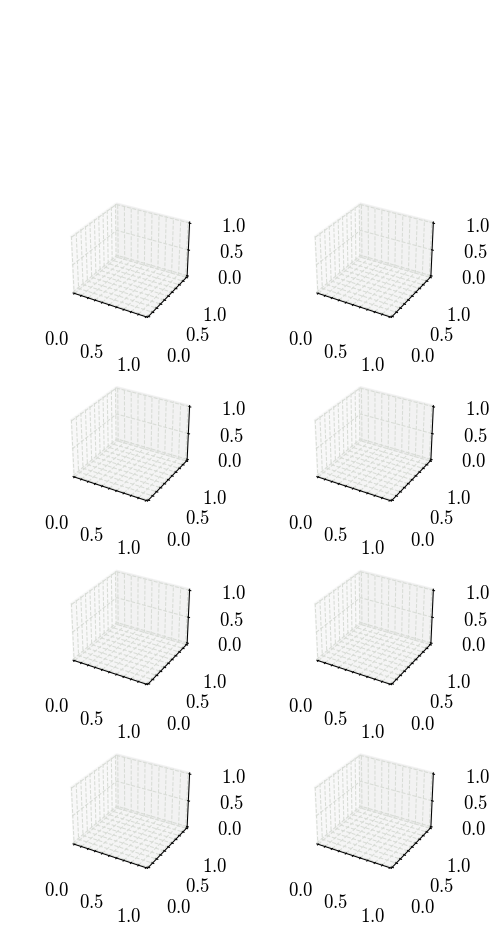

In [8]:
width = plt.rcParams['figure.figsize'][0]
height = plt.rcParams['figure.figsize'][1]

fig = plt.figure(figsize=(width, 2.5*height), layout='constrained')
cb_fig, curve_fig = fig.subfigures(2,1, height_ratios=[0.12,1], hspace=0.2, 
                                        wspace=0)

axs = curve_fig.subplot_mosaic(plot_mosaic, 
                               subplot_kw= dict(projection='3d'),
                               gridspec_kw = dict(wspace=0, hspace=0))

In [9]:
for name in mosaic_names:

    curve = gate_dict[name]

    curve_param = curve[:]['length']
    curve_param = curve_param/curve_param[-1]

    line_collection = plottools.plot_curve(curve[:]['curve'], 
                                           curve_param, axs[name+'_position'])
    
    plottools.plot_curve(curve[:]['frame'][:,0,:], 
                         curve_param, axs[name+'_tangent'])
    
    axs[name+'_position'].set_axis_off()
    axs[name+'_tangent'].set_axis_off()


cb_ax = cb_fig.add_axes([0.2,0,0.6,0.25])
cb = cb_fig.colorbar(line_collection,
                     location='top',
                     pad=0,
                     extend='both',
                     cax = cb_ax)

cb.set_label(r'Time $(t/T_g)$', 
             labelpad=matplotlib.rcParams['xtick.major.pad'])

label_dict = {}
for i, ax_name in enumerate(np.array(plot_mosaic).flatten()):
    label_dict[ax_name] = axs[ax_name].text2D(
                        0, 0.91, 
                        f'({'abcdefgh'[i]})', 
                        transform=axs[ax_name].transAxes,
                        fontsize = matplotlib.rcParams['axes.labelsize'])
    
label_dict['curve_label'] = fig.text(0.17,0.86,'Curves',
                            fontsize = matplotlib.rcParams['axes.labelsize'])

label_dict['tangent_label'] = fig.text(0.66,0.86,'Tangents',
                              fontsize = matplotlib.rcParams['axes.labelsize'])

In [10]:
axs['xgate_step50000_position'].view_init(elev=60,azim=40,roll=170)
axs['xgate_step50000_tangent'].view_init(elev=80,azim=120,roll=-60)

axs['hadamard_step0_position'].view_init(elev=80,azim=50,roll=25)
axs['hadamard_step0_tangent'].view_init(elev=80,azim=120,roll=-60)

axs['hadamard_step200_position'].view_init(elev=80,azim=50,roll=20)
axs['hadamard_step200_tangent'].view_init(elev=90,azim=-30,roll=90)

axs['hadamard_step50000_position'].view_init(elev=110,azim=50,roll=0)
axs['hadamard_step50000_tangent'].view_init(elev=90,azim=-20,roll=-10)

In [11]:
label_dict['xgate_label'] = fig.add_axes([0.42,0.75,0.15,0.15])
label_dict['xgate_label'].axline((0,0.5), (0.5,0.5), color='k')
label_dict['xgate_label'].set_axis_off()
text = label_dict['xgate_label'].text(0.5,0.5,'$X$', 
            bbox=dict(facecolor='white', edgecolor='black'),
            fontsize = matplotlib.rcParams['axes.labelsize'],
            transform= label_dict['xgate_label'].transAxes,
            verticalalignment='center',
            horizontalalignment='center')

In [12]:
label_dict['hadamard_label'] = fig.add_axes([0.42,0.55,0.15,0.15])
label_dict['hadamard_label'].axline((0,0.5), (0.5,0.5), color='k')
label_dict['hadamard_label'].set_axis_off()
text = label_dict['hadamard_label'].text(0.5,0.5,'$H$', 
            bbox=dict(facecolor='white', edgecolor='black'),
            fontsize = matplotlib.rcParams['axes.labelsize'],
            transform= label_dict['hadamard_label'].transAxes,
            verticalalignment='center',
            horizontalalignment='center')

In [13]:
label_dict['hadamard_init_label'] = fig.text(0.1,0.605, 'Initial condition',
                            fontsize = matplotlib.rcParams['axes.labelsize'])

In [14]:
label_dict['hadamard_step200_label'] = fig.text(0.1,0.405, 'Steps: $200$',
                            fontsize = matplotlib.rcParams['axes.labelsize'])

In [15]:
label_dict['hadamard_step50000_label'] = fig.text(0.1,0.205, r'Steps: $5\cdot 10^4$',
                            fontsize = matplotlib.rcParams['axes.labelsize'])

In [16]:
label_dict['xgate_step50000_label'] = fig.text(0.1,0.805, r'Steps: $5\cdot 10^4$',
                            fontsize = matplotlib.rcParams['axes.labelsize'])

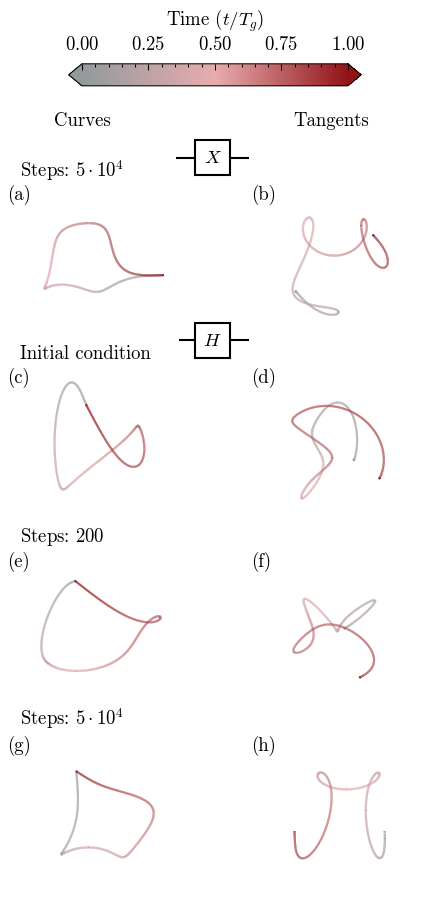

In [17]:
fig

In [18]:
fig.savefig('figs/curve_gallery.pdf')
fig.savefig('figs/curve_gallery.svg')

In [19]:
adj_fig_curve = misctools.prepare_bezier_from_file(os.path.join(os.getcwd(),
                                                   'control_points', 
                                                    'adj_points.csv'), 
                                                     is_barq=True)

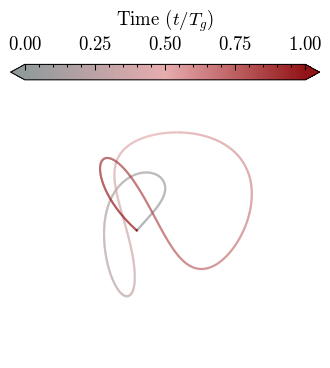

In [20]:
adj_fig_curve.plot_position()
plt.gca().view_init(*[60,50])
plt.savefig('figs/adj_curve.svg')